Mapping of STEM courses to our sectors

In [1]:
# To make relative imports work in notebooks
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


# actual imports
import pandas as pd
import os 
from src.constants import FIG_DIR
from src.dataLoading import getSalaries


import matplotlib.pyplot as plt

import seaborn as sns
import textwrap
from tueplots import bundles


In [2]:
data = getSalaries()

Create a new DataFrame with only the value from the column 'sector' 

In [3]:
# Get the list of columns in the DataFrame
columns_list = data.columns.tolist()

# Let's say you want to rename the column at index 2
columns_list[0] = 'sector'
columns_list[1] = 'year'
columns_list[2] = 'quarter'
columns_list[3] = 'salary'
columns_list[6] = 'salary'

# Assign the modified list of column names back to the DataFrame
data.columns = columns_list


# Create a new DataFrame with only the value from the column 'sector' 
filtered_data = data['sector'].tolist()

# Delete duplicates
unique_list = list(set(filtered_data))

# Filter out NaN values
sector_list = [x for x in unique_list if not pd.isna(x)]

Show length of new dataframe (number of different sectors in our economy) and show the first 5 sectors

In [4]:
print(len(sector_list))

# Print the first five elements
print(sector_list[:5])

4759
['6057', '6828', '4278', '5583', '7409']


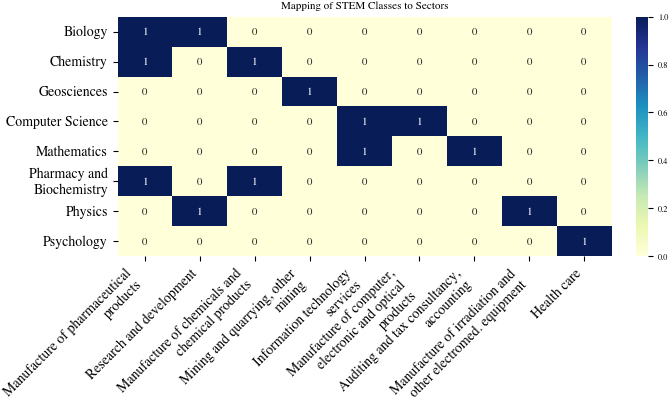

In [5]:

def wrap_labels(labels, width=30):
    return [textwrap.fill(label, width=width) for label in labels]


# Wrap the sector names for readability
sector_names = [
    'Manufacture of pharmaceutical products', 
    'Research and development', 
    'Manufacture of chemicals and chemical products', 
    'Mining and quarrying, other mining', 
    'Information technology services', 
    'Manufacture of computer, electronic and optical products', 
    'Auditing and tax consultancy, accounting', 
    'Manufacture of irradiation and other electromed. equipment', 
    'Health care'
]

# Wrap the sector names for readability
wrapped_sector_names = wrap_labels(sector_names)

# Map the original sector names to the wrapped names
name_mapping = dict(zip(sector_names, wrapped_sector_names))

# Initialize the data with zeros using the wrapped labels
data = {wrapped_name: [0, 0, 0, 0, 0, 0, 0, 0] for wrapped_name in wrapped_sector_names}

# Update the data to reflect the associations
# Biology
data[name_mapping['Manufacture of pharmaceutical products']][0] = 1  
data[name_mapping['Research and development']][0] = 1  

# Chemistry
data[name_mapping['Manufacture of chemicals and chemical products']][1] = 1  
data[name_mapping['Manufacture of pharmaceutical products']][1] = 1  

# Geosciences
data[name_mapping['Mining and quarrying, other mining']][2] = 1  
#data[name_mapping['Ore mining']][2] = 1  

# Computer Science
data[name_mapping['Information technology services']][3] = 1  
data[name_mapping['Manufacture of computer, electronic and optical products']][3] = 1  

# Mathematics
data[name_mapping['Information technology services']][4] = 1  
data[name_mapping['Auditing and tax consultancy, accounting']][4] = 1  

# Pharmacy and Biochemistry
data[name_mapping['Manufacture of chemicals and chemical products']][5] = 1  
data[name_mapping['Manufacture of pharmaceutical products']][5] = 1  

# Physics
data[name_mapping['Research and development']][6] = 1  
data[name_mapping['Manufacture of irradiation and other electromed. equipment']][6] = 1  

# Psychology
data[name_mapping['Health care']][7] = 1  
#data[name_mapping['Inpatient psychosocial care facilities, etc.']][7] = 1  

# Create the DataFrame using wrapped labels for columns
df = pd.DataFrame(data, index=[
    'Biology', 'Chemistry', 'Geosciences', 'Computer Science', 
    'Mathematics', 'Pharmacy and Biochemistry', 'Physics', 'Psychology'
])

# Wrap each index label
wrapped_labels = [textwrap.fill(label, width=20) for label in df.index]

# Create the heatmap
plt.rcParams.update(bundles.icml2022(column="full", nrows=1, ncols=1, usetex=False))
sns.heatmap(df, annot=True, cmap="YlGnBu")

# Set the wrapped labels as the y-tick labels
plt.yticks(plt.yticks()[0], wrapped_labels, va="center", rotation=0, fontsize=10)
# Adjust the labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Customize further as needed
plt.title('Mapping of STEM Classes to Sectors')

plt.savefig(FIG_DIR + "/STEMFieldsToSectorHeatMap.pdf")
plt.show()